In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Threasholding

In [16]:
image_path = r"C:\Users\Ashima\Desktop\Q3 2024\MV\room.jpg"
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## Global Threasholding

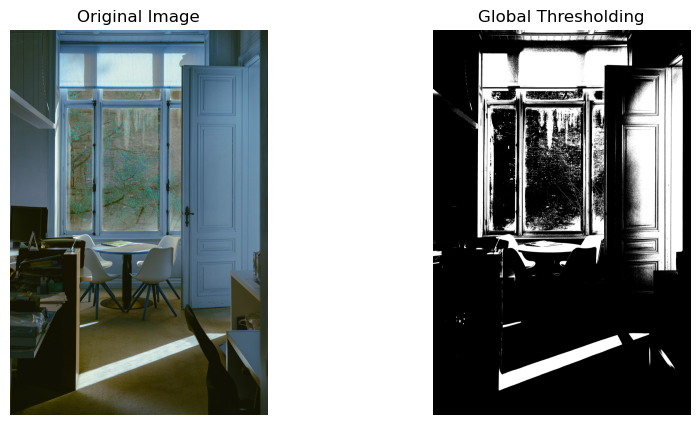

In [20]:
global_threshold_value = 128
_, global_thresholded = cv2.threshold(gray_image, global_threshold_value, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(global_thresholded, cmap='gray')
plt.title('Global Thresholding')
plt.axis('off')

plt.show()

## Variable Threasholding

In [25]:
def variable_threshold(image, block_size, constant):
    height, width = image.shape
    thresholded_image = np.zeros_like(image)

    for y in range(height):
        for x in range(width):
            #neighborhood region
            x1 = max(x - block_size // 2, 0)
            x2 = min(x + block_size // 2, width - 1)
            y1 = max(y - block_size // 2, 0)
            y2 = min(y + block_size // 2, height - 1)

            local_mean = np.mean(image[y1:y2 + 1, x1:x2 + 1])
            threshold_value = local_mean - constant

            thresholded_image[y, x] = 255 if image[y, x] > threshold_value else 0

    return thresholded_image

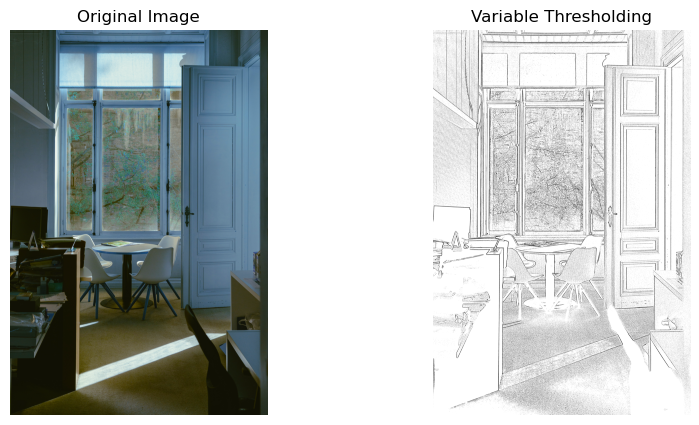

In [27]:
variable_thresholded = variable_threshold(gray_image, block_size=15, constant=10)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(variable_thresholded, cmap='gray')
plt.title('Variable Thresholding')
plt.axis('off')

plt.show()

## Local Threasholding

In [29]:
#using a mean filter
def local_threshold(image, block_size):
    local_thresh = cv2.adaptiveThreshold(image, 255,
                                          cv2.ADAPTIVE_THRESH_MEAN_C,
                                          cv2.THRESH_BINARY,
                                          block_size, 2)
    return local_thresh

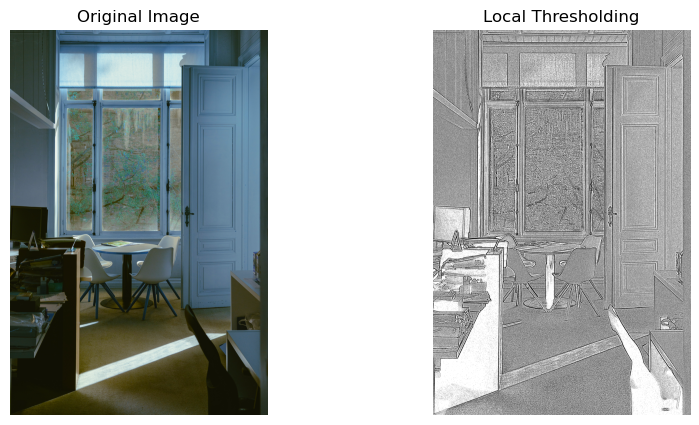

In [35]:
local_thresholded = local_threshold(gray_image, block_size=15)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(local_thresholded, cmap='gray')
plt.title('Local Thresholding')
plt.axis('off')

plt.show()

## Adaptive Threasholding

In [37]:
def adaptive_threshold(image):
    adaptive_thresh = cv2.adaptiveThreshold(image, 255,
                                             cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                             cv2.THRESH_BINARY,
                                             11, 2)
    return adaptive_thresh

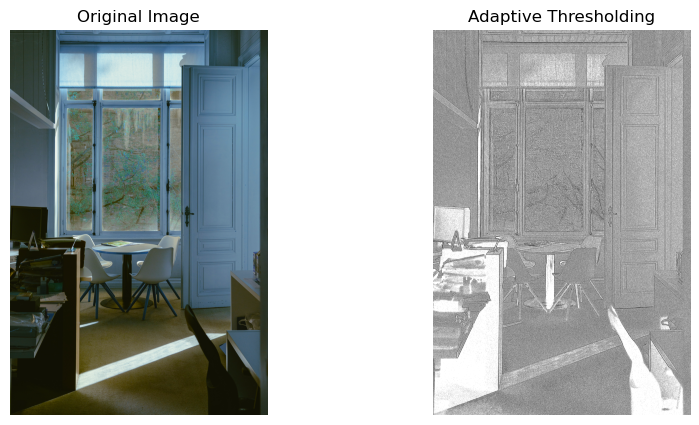

In [39]:
adaptive_thresholded = adaptive_threshold(gray_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(adaptive_thresholded, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')

plt.show()

# Region Growing

In [41]:
def region_growing(image, seed, threshold):
    height, width = image.shape
    segmented_image = np.zeros_like(image)
    visited = np.zeros_like(image, dtype=bool)
    seed_value = image[seed]

    #Initialize the region with the seed point
    pixel_list = [seed]
    
    while pixel_list:
        current_pixel = pixel_list.pop()
        x, y = current_pixel
        
        if visited[x, y]:
            continue
        
        visited[x, y] = True
        if abs(int(image[x, y]) - int(seed_value)) < threshold:
            segmented_image[x, y] = 255  # Add to region
            
            #neighboring pixels
            if x > 0: pixel_list.append((x - 1, y))  # Up
            if x < height - 1: pixel_list.append((x + 1, y))  # Down
            if y > 0: pixel_list.append((x, y - 1))  # Left
            if y < width - 1: pixel_list.append((x, y + 1))  # Right

    return segmented_image

In [71]:
image_path = r"C:\Users\Ashima\Desktop\Q3 2024\MV\car.jpg"
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

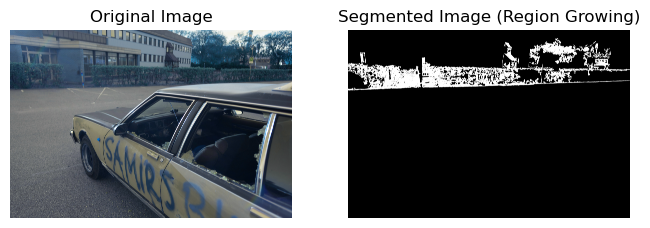

In [76]:
seed_point = (1000, 1000) 
threshold_value = 15

segmented_image = region_growing(gray_image, seed_point, threshold_value)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image (Region Growing)')
plt.axis('off')

plt.show()

In [78]:
image_path = r"C:\Users\Ashima\Desktop\Q3 2024\MV\jupiter_red_spot.jpg"
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

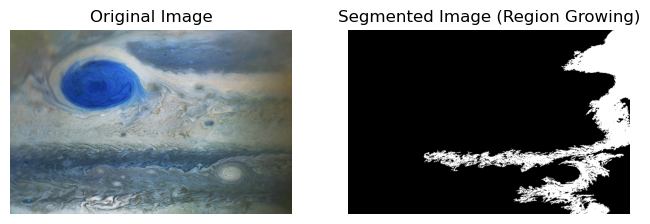

In [82]:
seed_point = (500, 1000) 
threshold_value = 15

segmented_image = region_growing(gray_image, seed_point, threshold_value)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image (Region Growing)')
plt.axis('off')

plt.show()